In [5]:
import boto3
import json
import pandas as pd

def read_json_files_from_s3(bucket_name, prefix=None, max_files=None):
    # Inicializa o recurso S3
    s3r = boto3.resource('s3')

    # Referência ao bucket S3
    bucket = s3r.Bucket(bucket_name)

    # Armazena os conteúdos dos arquivos JSON
    json_files_contents = []

    # Variável para contar o número de arquivos processados
    file_count = 0

    # Itera sobre os objetos no bucket, com o prefixo (se fornecido)
    if prefix:
        objects = bucket.objects.filter(Prefix=prefix)
    else:
        objects = bucket.objects.all()

    # Processa os arquivos do bucket
    for obj in objects:
        # Verifica se o arquivo é JSON
        if obj.key.endswith('.json'):
            # Obtém o conteúdo do arquivo
            file_content = obj.get()['Body'].read().decode('utf-8')

            # Converte o conteúdo do JSON para um dicionário Python e armazena
            json_data = json.loads(file_content)
            json_files_contents.append(json_data)  # Armazena como dicionário

            # Incrementa o contador de arquivos processados
            file_count += 1

            # Verifica se atingiu o limite de arquivos
            if max_files and file_count >= max_files:
                break

    # Converte a lista de dicionários em um DataFrame
    df = pd.DataFrame(json_files_contents)

    return df

In [10]:
import pandas as pd
json_data = read_json_files_from_s3('match-info',max_files=8000)
# Combine todos os DataFrames em um único
# final_df = pd.concat(json_data, ignore_index=True)

# Exiba o DataFrame final
# print(json_data)


In [6]:
print(json_data.head(10))

                                            metadata  \
0  {'dataVersion': '2', 'matchId': 'BR1_271317129...   
1  {'dataVersion': '2', 'matchId': 'BR1_271333227...   
2  {'dataVersion': '2', 'matchId': 'BR1_271568576...   
3  {'dataVersion': '2', 'matchId': 'BR1_272321465...   
4  {'dataVersion': '2', 'matchId': 'BR1_272412320...   
5  {'dataVersion': '2', 'matchId': 'BR1_272432273...   
6  {'dataVersion': '2', 'matchId': 'BR1_272491571...   
7  {'dataVersion': '2', 'matchId': 'BR1_272494082...   
8  {'dataVersion': '2', 'matchId': 'BR1_272760619...   
9  {'dataVersion': '2', 'matchId': 'BR1_272761074...   

                                                info  
0  {'gameCreation': 1681438038816, 'gameDuration'...  
1  {'gameCreation': 1681485266659, 'gameDuration'...  
2  {'gameCreation': 1681845237790, 'gameDuration'...  
3  {'gameCreation': 1682991351393, 'gameDuration'...  
4  {'gameCreation': 1683164234825, 'gameDuration'...  
5  {'gameCreation': 1683217775174, 'gameDuration'... 

In [4]:
s3r = boto3.resource('s3')
bucket = s3r.Bucket('match-info')
files_in_bucket = list(bucket.objects.all())

In [8]:
from io import StringIO

In [70]:
import boto3
import pandas as pd
import json

# Inicialize a sessão boto3
session = boto3.Session()
s3 = session.client('s3')


# Liste todos os arquivos JSON no bucket/prefixo
response = s3.list_objects_v2(Bucket='match-info')
response2 = s3.list_objects_v2(Bucket='match-info2')
response3 = s3.list_objects_v2(Bucket='match-info3')
response4 = s3.list_objects_v2(Bucket='match-info4')

# Inicialize uma lista para armazenar os DataFrames
dfs = []

def teste(content, bucket_name):
    # Percorra os arquivos encontrados e leia cada um deles em um DataFrame pandas
    for obj in content.get('Contents', []):
        key = obj['Key']
        if key.endswith('.json'):
        # Baixe o arquivo JSON para uma string
            file_content = s3.get_object(Bucket=bucket_name, Key=key)['Body'].read().decode('utf-8')
        
        # Converta a string JSON para um DataFrame pandas
            data = json.loads(file_content)
            df = pd.json_normalize(data)
        
        # Adicione o DataFrame à lista
            dfs.append(df)

teste(response, 'match-info')

# Combine todos os DataFrames em um único
final_df = pd.concat(dfs, ignore_index=True)

# Exiba o DataFrame final
print(final_df.head())


  metadata.dataVersion metadata.matchId  \
0                    2   BR1_2987113206   
1                    2   BR1_2987123899   
2                    2   BR1_2987149819   
3                    2   BR1_2987150145   
4                    2   BR1_2987164868   

                               metadata.participants info.endOfGameResult  \
0  [kRAwT_AzybMRJgJR7KydsG3Gixq-Liz1Iwdvjp-9DFqNv...         GameComplete   
1  [CCYDIq9aKuVM1rkaGIkdaHdFdU8UZGGrhT4gZYMGf1-sE...         GameComplete   
2  [2-gM8qWYnXk1tiTAhwrsHBb6jdWhjlr44VpWk6tbjmN9P...         GameComplete   
3  [KMKkqg5MZuNMLAVwzQD75-hFf29tepEt8ANjxwlSVTO4_...         GameComplete   
4  [ipRZQ_8KM6vARND5qeJQELl02qnVsHtT__rIkY2RJZxd-...         GameComplete   

   info.gameCreation  info.gameDuration  info.gameEndTimestamp  info.gameId  \
0      1724032306872                890          1724033249350   2987113206   
1      1724034243237               2341          1724036699536   2987123899   
2      1724038152150               2287  

In [81]:
final_df.shape

(2928, 19)

In [ ]:
#puuid #valores #resultado da partida 

In [11]:
processed_data = []

# Itera por cada linha (partida)
for index, row in json_data.iterrows():
    if 'CLASSIC' in row['info']['gameMode']:
#         print(row['info']['gameMode'])
        match_data = {}

        participants = row['info']['participants']
#         print(participants)
        teams = row['info']['teams']  
        for i, participant in enumerate(participants):
#             kills = participant['kills']
#             deaths = participant['deaths']
#             assists = participant['assists']        

            
            if 'challenges' in participant:
                kda = participant['challenges']['kda']
                gold_per_minute = participant['challenges']['goldPerMinute']
            
            vision_score = participant['visionScore']

            match_data[f'player_{i+1}_kda'] = kda
            match_data[f'player_{i+1}_gold_per_minute'] = gold_per_minute
            match_data[f'player_{i+1}vision_score'] = vision_score

        team_100 = next(team for team in teams if team['teamId'] == 100)
        match_data['team_100_won'] = 1 if team_100['win'] else 0

        processed_data.append(match_data)

processed_df = pd.DataFrame(processed_data)

csv_buffer = StringIO()
processed_df.to_csv(csv_buffer, index=False)

s3 = boto3.client('s3')

# Nome do bucket e chave (nome do arquivo no S3)
bucket_name = 'match-dataset'
s3_key = 'matchs.csv'

# Salva o CSV no S3
s3.put_object(Bucket=bucket_name, Key=s3_key, Body=csv_buffer.getvalue())

print("CSV criado e salvo no S3 com sucesso!")

CSV criado e salvo no S3 com sucesso!


In [1]:
from io import StringIO
import boto3
import pandas as pd
s3_client = boto3.client('s3')

/usr/local/lib/python3.7/site-packages/boto3/compat.py:82: PythonDeprecationWarning: Boto3 will no longer support Python 3.7 starting December 13, 2023. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.8 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


In [2]:
 # Baixar o arquivo do S3
csv_file = s3_client.get_object(Bucket='match-dataset', Key='matchs.csv')
    
# Ler o conteúdo do arquivo como uma string
csv_content = csv_file['Body'].read().decode('utf-8')
    
 # Converter para um DataFrame usando StringIO
df = pd.read_csv(StringIO(csv_content))

In [3]:
df.head()

,player_1_kda,player_1_gold_per_minute,player_1vision_score,player_2_kda,player_2_gold_per_minute,player_2vision_score,player_3_kda,player_3_gold_per_minute,player_3vision_score,player_4_kda,...,player_8_kda,player_8_gold_per_minute,player_8vision_score,player_9_kda,player_9_gold_per_minute,player_9vision_score,player_10_kda,player_10_gold_per_minute,player_10vision_score,team_100_won
0,0.777778,312.359322,11,1.428571,374.972279,16,1.000000,327.846701,22,0.666667,...,16.000000,443.347430,12,5.666667,431.485156,20,2.222222,364.826857,20,0
1,0.142857,248.041393,17,1.083333,500.868665,33,1.200000,325.633881,17,1.750000,...,6.000000,394.152972,14,5.000000,410.426203,18,1.625000,295.913241,78,0
2,0.666667,385.706379,14,1.285714,298.721516,19,2.800000,437.822358,18,1.857143,...,0.000000,165.441295,1,3.000000,492.974074,20,2.500000,278.620869,20,0
3,0.700000,268.625633,16,0.714286,364.690117,9,1.571429,242.031722,21,0.833333,...,9.666667,563.789817,17,4.000000,337.528628,9,6.000000,482.514843,25,0
4,4.000000,376.830244,11,10.000000,442.087571,13,3.000000,459.130644,18,6.000000,...,0.750000,274.158177,9,1.500000,378.432570,9,0.833333,229.317978,26,1


In [4]:
X = df.drop(columns=['team_100_won'])
y = df['team_100_won']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [6]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Criar o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [8]:
# Treinar o modelo
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar a performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

Acurácia: 0.9349794238683128


In [10]:
import matplotlib.pyplot as plt

In [15]:
nova_entrada = [
[1, 433.30803097675533, 19], [3, 426.58727064897784, 19], [1, 489.9826178896077, 19.25], [2.6666666666666665, 524.2297062100663, 20.0], [3, 326.4970999927794, 39.95], [2.3636363636363638, 471.69953636674893, 4], [2.5, 398.19929456739226, 30.95], [2.75, 476.4634867820679, 27], [3.2046825396825396, 462.6115483421969, 12], [2, 422.936363195574, 21]
]

# Transformar a entrada em um array unidimensional (como está no seu exemplo original)
nova_entrada_unidimensional = [item for sublist in nova_entrada for item in sublist]

# Fazer predição com o modelo treinado
predicao = model.predict([nova_entrada_unidimensional])
print(f'Predição para a nova entrada: {predicao}')

Predição para a nova entrada: [0]


/usr/local/lib64/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


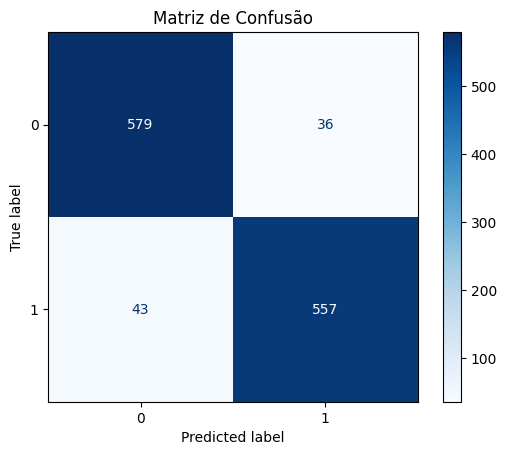

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()

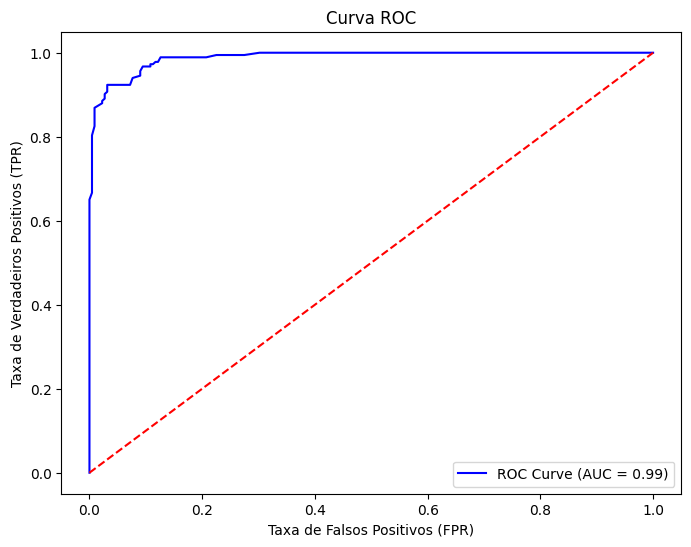

In [89]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prever probabilidades no conjunto de teste
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()